#Covid-19 Data Analysis

Importing required Libraries:-


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from plotly.subplots import make_subplots
from datetime import datetime


Importing the csv dataset:-

In [ ]:
covid_df = pd.read_csv('/content/covid_19_india.csv')
print("Dataset imported successfully")

Dataset imported successfully


Display first 10 rows of the dataset:-

In [ ]:
covid_df.head(10)

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1.0,2020-01-30,6:00 PM,Kerala,1,0,0.0,0.0,1.0
1,2.0,2020-01-31,6:00 PM,Kerala,1,0,0.0,0.0,1.0
2,3.0,2020-02-01,6:00 PM,Kerala,2,0,0.0,0.0,2.0
3,4.0,2020-02-02,6:00 PM,Kerala,3,0,0.0,0.0,3.0
4,5.0,2020-02-03,6:00 PM,Kerala,3,0,0.0,0.0,3.0
5,6.0,2020-02-04,6:00 PM,Kerala,3,0,0.0,0.0,3.0
6,7.0,2020-02-05,6:00 PM,Kerala,3,0,0.0,0.0,3.0
7,8.0,2020-02-06,6:00 PM,Kerala,3,0,0.0,0.0,3.0
8,9.0,2020-02-07,6:00 PM,Kerala,3,0,0.0,0.0,3.0
9,10.0,2020-02-08,6:00 PM,Kerala,3,0,0.0,0.0,3.0


Lets get some info about our dataset:-

In [ ]:
covid_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15114 entries, 0 to 15113
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Sno                       15086 non-null  float64
 1   Date                      15086 non-null  object 
 2   Time                      15086 non-null  object 
 3   State/UnionTerritory      15086 non-null  object 
 4   ConfirmedIndianNational   15086 non-null  object 
 5   ConfirmedForeignNational  15086 non-null  object 
 6   Cured                     15086 non-null  float64
 7   Deaths                    15086 non-null  float64
 8   Confirmed                 15086 non-null  float64
dtypes: float64(4), object(5)
memory usage: 1.0+ MB


Lets see some stats about our dataset:-

In [ ]:
covid_df.describe()

,Sno,Cured,Deaths,Confirmed
count,15086.000000,1.508600e+04,15086.000000,1.508600e+04
mean,7543.500000,1.747937e+05,2721.084449,1.942820e+05
std,4355.097416,3.648330e+05,7182.672358,4.095184e+05
min,1.000000,0.000000e+00,0.000000,0.000000e+00
25%,3772.250000,1.685000e+03,12.000000,2.935500e+03
50%,7543.500000,1.964700e+04,364.000000,2.608150e+04
75%,11314.750000,2.087552e+05,2170.000000,2.216012e+05
max,15086.000000,4.927480e+06,83777.000000,5.433506e+06


Dropping Unwanted Columns:-

In [ ]:
covid_df.drop(["Sno", "Time", "ConfirmedIndianNational", "ConfirmedForeignNational"], inplace = True, axis = 1)


In [ ]:
covid_df.head(10)

,Date,State/UnionTerritory,Cured,Deaths,Confirmed
0,2020-01-30,Kerala,0.0,0.0,1.0
1,2020-01-31,Kerala,0.0,0.0,1.0
2,2020-02-01,Kerala,0.0,0.0,2.0
3,2020-02-02,Kerala,0.0,0.0,3.0
4,2020-02-03,Kerala,0.0,0.0,3.0
5,2020-02-04,Kerala,0.0,0.0,3.0
6,2020-02-05,Kerala,0.0,0.0,3.0
7,2020-02-06,Kerala,0.0,0.0,3.0
8,2020-02-07,Kerala,0.0,0.0,3.0
9,2020-02-08,Kerala,0.0,0.0,3.0


Now Finding Active Covid cases :-

In [ ]:
covid_df["Active_Cases"] = covid_df['Confirmed'] - ( covid_df['Cured'] + covid_df['Deaths'] )


Now looking at State/UnionTerriorty wise Active Cases:-

In [ ]:
grouped_data = covid_df.groupby('State/UnionTerritory')['Active_Cases'].sum()
print(grouped_data)

State/UnionTerritory
Andaman and Nicobar Islands                    56663.0
Andhra Pradesh                              13049286.0
Arunachal Pradesh                             277460.0
Assam                                        3894468.0
Bihar                                        5373856.0
Cases being reassigned to states              345565.0
Chandigarh                                    522340.0
Chhattisgarh                                 8764864.0
Dadra and Nagar Haveli and Daman and Diu       86135.0
Daman & Diu                                        2.0
Delhi                                        8410456.0
Goa                                          1337269.0
Gujarat                                      7547563.0
Haryana                                      5566509.0
Himachal Pradesh                             1529351.0
Jammu and Kashmir                            2867846.0
Jharkhand                                    2990432.0
Karnataka                                   

Chaning the format of the Date column:-

In [ ]:
covid_df['Date'] = pd.to_datetime(covid_df['Date'])

Creating a Statewise Pivot_Table :-

In [ ]:
statewise = pd.pivot_table(covid_df, values = ["Confirmed", "Deaths", "Cured"], index = "State/UnionTerritory", aggfunc= max)

/tmp/ipython-input-3712075709.py:1: FutureWarning: The provided callable <built-in function max> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  statewise = pd.pivot_table(covid_df, values = ["Confirmed", "Deaths", "Cured"], index = "State/UnionTerritory", aggfunc= max)


In [ ]:
statewise["Recovery Rate"] = statewise["Cured"] * 100 / statewise["Confirmed"]

In [ ]:
statewise["Mortality Rate"] = statewise["Deaths"] * 100 / statewise["Confirmed"]

In [ ]:
statewise = statewise.sort_values(by = "Confirmed", ascending = False)

In [ ]:
statewise.style.background_gradient(cmap = "bone")

,Confirmed,Cured,Deaths,Recovery Rate,Mortality Rate
State/UnionTerritory,,,,,
Maharashtra,5433506.000000,4927480.000000,83777.000000,90.686934,1.541859
Karnataka,2272374.000000,1674487.000000,22838.000000,73.688882,1.005028
Kerala,2200706.000000,1846105.000000,6612.000000,83.886944,0.300449
Tamil Nadu,1664350.000000,1403052.000000,18369.000000,84.300297,1.103674
Uttar Pradesh,1637663.000000,1483249.000000,18072.000000,90.571076,1.103524
Andhra Pradesh,1475372.000000,1254291.000000,9580.000000,85.015237,0.649328
Delhi,1402873.000000,1329899.000000,22111.000000,94.798246,1.576123
West Bengal,1171861.000000,1026492.000000,13576.000000,87.595030,1.158499
Chhattisgarh,925531.000000,823113.000000,12036.000000,88.934136,1.300443


Top 10 Active Cases States:-

/tmp/ipython-input-749481647.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_10_active_cases.iloc[:10], x = "State/UnionTerritory", y =   "Active_Cases", linewidth = 2, edgecolor = 'red', palette = "plasma")


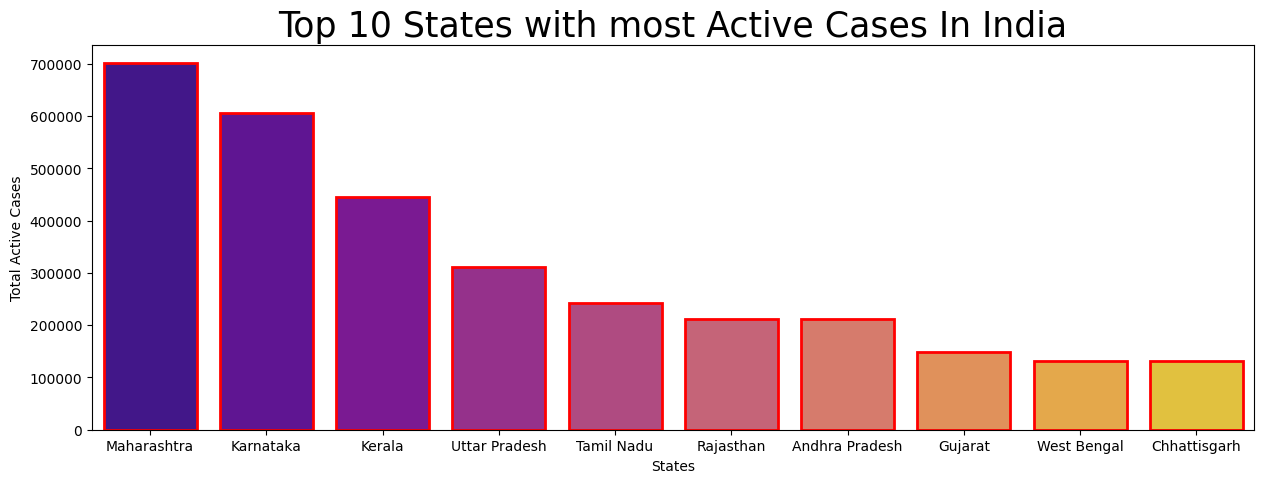

In [ ]:
top_10_active_cases = covid_df.groupby(by = "State/UnionTerritory").max()[["Active_Cases", "Date"]].sort_values(by = ["Active_Cases"], ascending = False).reset_index()

fig = plt.figure(figsize = (15, 5))

plt.title("Top 10 States with most Active Cases In India", size = 25)

ax = sns.barplot(data = top_10_active_cases.iloc[:10], x = "State/UnionTerritory", y =   "Active_Cases", linewidth = 2, edgecolor = 'red', palette = "plasma")
plt.xlabel("States")
plt.ylabel("Total Active Cases")
plt.show()

Top States with Highest Deaths:-

/tmp/ipython-input-2426855524.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(data = top_10_deaths.iloc[:10], x = "State/UnionTerritory", y =   "Deaths", linewidth = 2, edgecolor = 'black', palette = "summer")


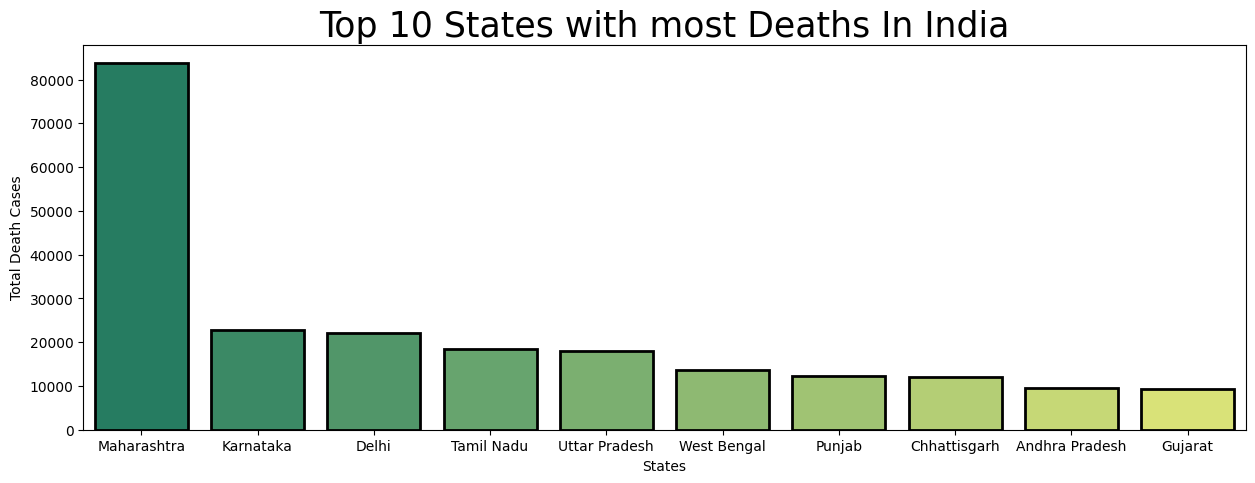

In [ ]:
top_10_deaths = covid_df.groupby(by = "State/UnionTerritory").max()[["Deaths", "Date"]].sort_values(by = ["Deaths"], ascending = False).reset_index()

fig = plt.figure(figsize = (15, 5))

plt.title("Top 10 States with most Deaths In India", size = 25)

ax = sns.barplot(data = top_10_deaths.iloc[:10], x = "State/UnionTerritory", y =   "Deaths", linewidth = 2, edgecolor = 'black', palette = "summer")
plt.xlabel("States")
plt.ylabel("Total Death Cases")
plt.show()

Growth trends in Active Cases:-

Text(0.5, 1.0, 'Top 5 Affected States in India')

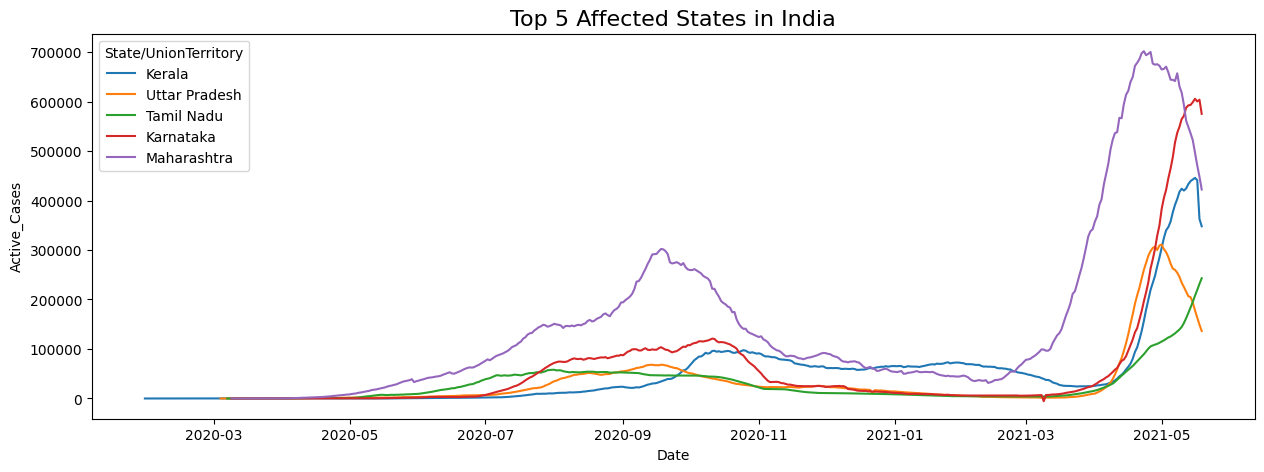

In [ ]:
fig = plt.figure(figsize = (15, 5))

ax = sns.lineplot(data = covid_df[covid_df["State/UnionTerritory"].isin(['Maharashtra', 'Karnataka', 'Kerala', 'Tamil Nadu', 'Uttar Pradesh'])], x = "Date", y =   "Active_Cases", hue = "State/UnionTerritory")
ax.set_title("Top 5 Affected States in India", size = 16)

Now importing second dataset related to vaccination :-

In [ ]:
vaccine_df = pd.read_csv('/content/covid_vaccine_statewise.csv')
print("Dataset imported successfully")

Dataset imported successfully


Displaying first 10 row of the dataset:-

In [ ]:
vaccine_df.head(10)

,Updated On,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


Renaming 'Updated On' column to 'Vaccine_Date':-

In [ ]:
vaccine_df.rename(columns= {'Updated On' : 'Vaccine_Date'}, inplace = True)

In [ ]:
vaccine_df.head(10)

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),...,18-44 Years (Doses Administered),45-60 Years (Doses Administered),60+ Years (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0
5,21/01/2021,India,365965.0,32226.0,12600.0,365965.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,132784.0,233143.0,38.0,365965.0
6,22/01/2021,India,549381.0,36988.0,14115.0,549381.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,193899.0,355402.0,80.0,549381.0
7,23/01/2021,India,759008.0,43076.0,15605.0,759008.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,267856.0,491049.0,103.0,759008.0
8,24/01/2021,India,835058.0,49851.0,18111.0,835058.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,296283.0,538647.0,128.0,835058.0
9,25/01/2021,India,1277104.0,55151.0,19682.0,1277104.0,0.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,444137.0,832766.0,201.0,1277104.0


Dispaying info of our vaccine dataset:-

In [ ]:
vaccine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7845 entries, 0 to 7844
Data columns (total 24 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Vaccine_Date                         7845 non-null   object 
 1   State                                7845 non-null   object 
 2   Total Doses Administered             7621 non-null   float64
 3   Sessions                             7621 non-null   float64
 4    Sites                               7621 non-null   float64
 5   First Dose Administered              7621 non-null   float64
 6   Second Dose Administered             7621 non-null   float64
 7   Male (Doses Administered)            7461 non-null   float64
 8   Female (Doses Administered)          7461 non-null   float64
 9   Transgender (Doses Administered)     7461 non-null   float64
 10   Covaxin (Doses Administered)        7621 non-null   float64
 11  CoviShield (Doses Administered

Finding Sum of All Missing Values:-

In [ ]:
vaccine_df.isnull().sum()

,0
Vaccine_Date,0
State,0
Total Doses Administered,224
Sessions,224
Sites,224
First Dose Administered,224
Second Dose Administered,224
Male (Doses Administered),384
Female (Doses Administered),384
Transgender (Doses Administered),384


Dropping Some Columns with too many missing values:-

In [ ]:
vaccination = vaccine_df.drop(columns = ['Sputnik V (Doses Administered)', 'AEFI', '18-44 Years (Doses Administered)', '45-60 Years (Doses Administered)', '60+ Years (Doses Administered)'], axis = 1)


In [ ]:
vaccination.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
0,16/01/2021,India,48276.0,3455.0,2957.0,48276.0,0.0,NaN,NaN,NaN,579.0,47697.0,NaN,NaN,NaN,23757.0,24517.0,2.0,48276.0
1,17/01/2021,India,58604.0,8532.0,4954.0,58604.0,0.0,NaN,NaN,NaN,635.0,57969.0,NaN,NaN,NaN,27348.0,31252.0,4.0,58604.0
2,18/01/2021,India,99449.0,13611.0,6583.0,99449.0,0.0,NaN,NaN,NaN,1299.0,98150.0,NaN,NaN,NaN,41361.0,58083.0,5.0,99449.0
3,19/01/2021,India,195525.0,17855.0,7951.0,195525.0,0.0,NaN,NaN,NaN,3017.0,192508.0,NaN,NaN,NaN,81901.0,113613.0,11.0,195525.0
4,20/01/2021,India,251280.0,25472.0,10504.0,251280.0,0.0,NaN,NaN,NaN,3946.0,247334.0,NaN,NaN,NaN,98111.0,153145.0,24.0,251280.0


Male vs Female vaccination:-

In [ ]:
male = vaccination['Male(Individuals Vaccinated)'].sum()
female = vaccination['Female(Individuals Vaccinated)'].sum()
px.pie(names = ["Male", "Female"], values = [male, female], title = "Male vs Female Vaccination")



Removing Rows where State = India:-

In [ ]:
vaccine = vaccination[vaccination.State != 'India']

In [ ]:
vaccine.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total Individuals Vaccinated
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0


Renaming column "Total Individual Vaccinated" to "Total" :-

In [ ]:
vaccine.rename(columns = {'Total Individuals Vaccinated' : 'Total'}, inplace = True)

/tmp/ipython-input-2834304648.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
vaccine.head()

,Vaccine_Date,State,Total Doses Administered,Sessions,Sites,First Dose Administered,Second Dose Administered,Male (Doses Administered),Female (Doses Administered),Transgender (Doses Administered),Covaxin (Doses Administered),CoviShield (Doses Administered),18-44 Years(Individuals Vaccinated),45-60 Years(Individuals Vaccinated),60+ Years(Individuals Vaccinated),Male(Individuals Vaccinated),Female(Individuals Vaccinated),Transgender(Individuals Vaccinated),Total
212,16/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
213,17/01/2021,Andaman and Nicobar Islands,23.0,2.0,2.0,23.0,0.0,12.0,11.0,0.0,0.0,23.0,NaN,NaN,NaN,NaN,NaN,NaN,23.0
214,18/01/2021,Andaman and Nicobar Islands,42.0,9.0,2.0,42.0,0.0,29.0,13.0,0.0,0.0,42.0,NaN,NaN,NaN,NaN,NaN,NaN,42.0
215,19/01/2021,Andaman and Nicobar Islands,89.0,12.0,2.0,89.0,0.0,53.0,36.0,0.0,0.0,89.0,NaN,NaN,NaN,NaN,NaN,NaN,89.0
216,20/01/2021,Andaman and Nicobar Islands,124.0,16.0,3.0,124.0,0.0,67.0,57.0,0.0,0.0,124.0,NaN,NaN,NaN,NaN,NaN,NaN,124.0


Finding Most Vaccinated State:-

In [ ]:
max_vaccinated = vaccine.groupby('State')['Total'].sum().to_frame('Total')
max_vaccinated = max_vaccinated.sort_values('Total', ascending = False)[:5]
max_vaccinated.style.background_gradient(cmap = 'winter')

,Total
State,
Maharashtra,1403075494.000000
Uttar Pradesh,1200575482.000000
Rajasthan,1141162807.000000
Gujarat,1078260544.000000
West Bengal,925022706.000000


Creating A Bar Plot for Top 5 States in terms of Vaccination :-

/tmp/ipython-input-1957183698.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




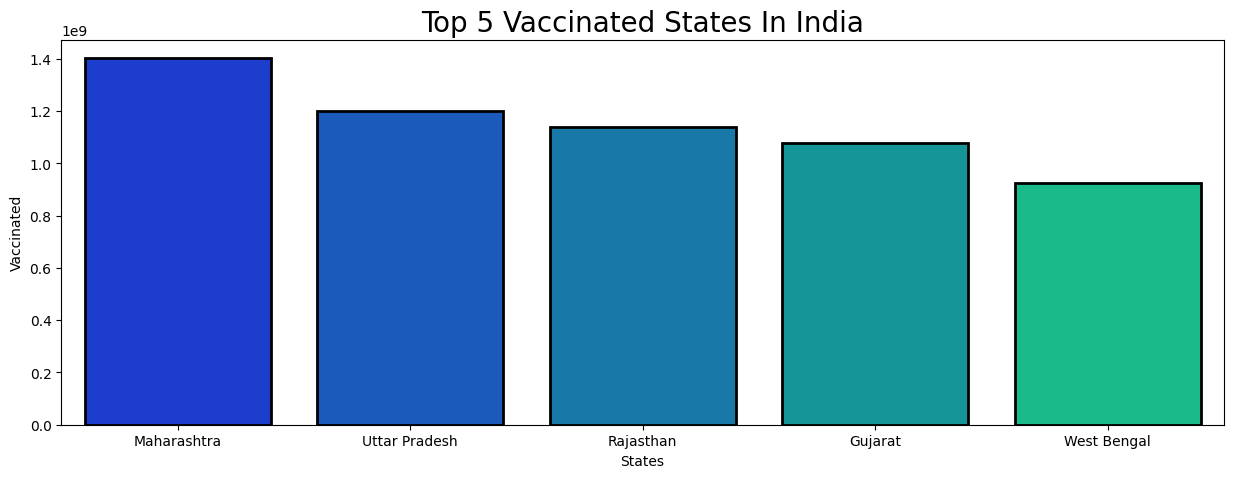

In [ ]:
fig = plt.figure(figsize = (15, 5))
plt.title("Top 5 Vaccinated States In India", size = 20)
x = sns.barplot(data= max_vaccinated.iloc[:10], y= max_vaccinated.Total, x = max_vaccinated.index, linewidth= 2,edgecolor = 'black', palette = "winter")
plt.xlabel("States")
plt.ylabel("Vaccinated")
plt.show()

Finding Least Vaccinated State:-

In [ ]:
min_vaccinated = vaccine.groupby('State')['Total'].sum().to_frame('Total')
min_vaccinated = min_vaccinated.sort_values('Total', ascending = True)[:5]
min_vaccinated.style.background_gradient(cmap = 'autumn')

,Total
State,
Lakshadweep,2124715.000000
Andaman and Nicobar Islands,8102125.000000
Ladakh,9466289.000000
Dadra and Nagar Haveli and Daman and Diu,11358600.000000
Sikkim,16136752.000000


Creating A Bar Plot for Bottom 5 States in terms of Vaccination :-

/tmp/ipython-input-2002733939.py:3: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




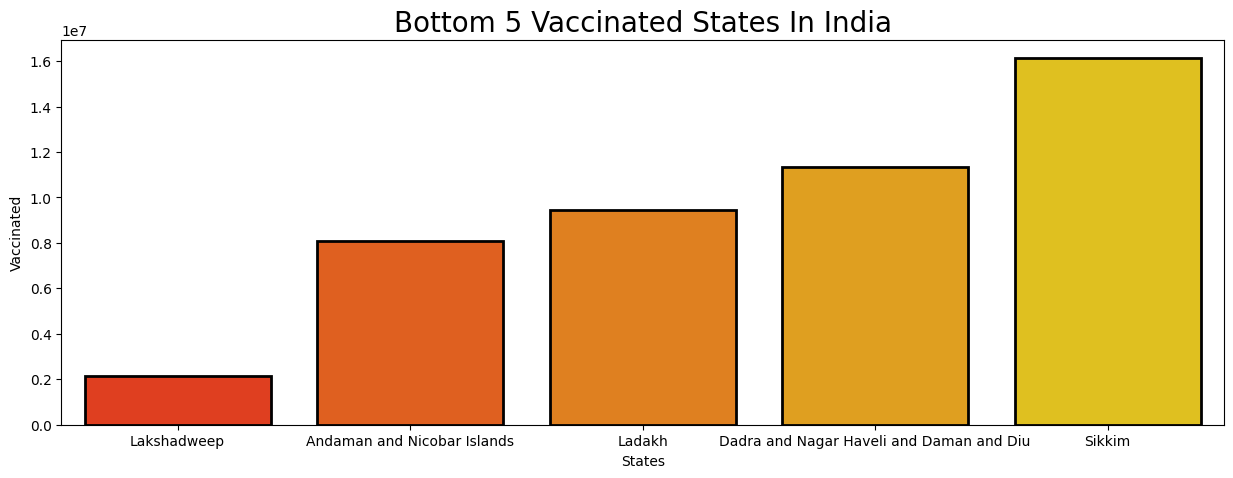

In [ ]:
fig = plt.figure(figsize = (15, 5))
plt.title("Bottom 5 Vaccinated States In India", size = 20)
x = sns.barplot(data= min_vaccinated.iloc[:10], y= min_vaccinated.Total, x = min_vaccinated.index, linewidth= 2,edgecolor = 'black', palette = "autumn")
plt.xlabel("States")
plt.ylabel("Vaccinated")
plt.show()

#Conclusion:-

Q1 - What Are the Top 10 Covid-19 active cases states?
Ans - Maharashtra > Karnatak > Kerala > Uttar Pradesh > Tamil Nadu > Andhra Pradesh > Rajasthan > Gujarat > West Bengal > Chattishgarh

Q2 - What Are Top 10 States with Highest Deaths ?
Ans - Maharashtra > Karnataka > Delhi > Tamil Nadu > Uttar Pradesh > West Bengal > Punjab > Chattishgarh > Andhra Pradesh > Gujarat

Q3 - What Are Top 5 Affected States in India ?
Ans - Kerala, Uttar Pradesh, Tamil Nadu, Karnataka , Maharashtra

Q4 - What is The Male vs Female Vaccination percentage ?
Ans - Male - 53%, Female - 47%

Q5 - What are Top 5 Vaccinated States in India ?
Ans - Maharashtra > Uttar Pradesh > Rajasthan > Gujarat > West Bengal

Q6 - What are Bottom 5 Vaccinate States in India ?
Ans - Lakshadweep < Andaman & Nicobar Islands < Ladhak < Dadar & Nagar Haveli and Daman & Diu < Sikkim

#Thank You